In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Make graphs look better
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# Load the uploaded CSV file
df = pd.read_csv('trained_data.csv')

# Display first 5 rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Summary of all columns
df.info()

# Check missing values
df.isnull().sum()


Dataset shape: (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [4]:
# Fill missing categorical values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill missing numerical values with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Confirm all missing values are handled
df.isnull().sum()


/tmp/ipython-input-4-4150505778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-4-4150505778.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


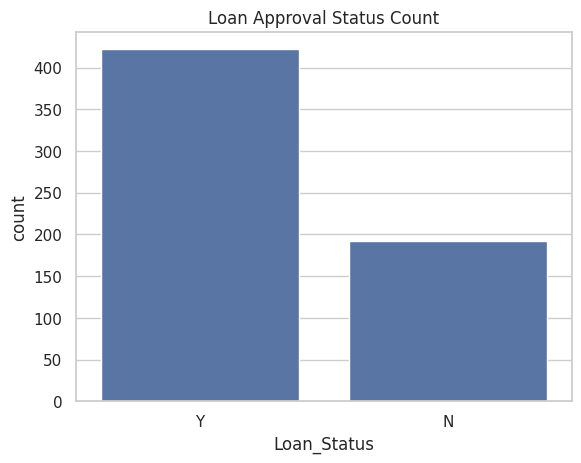

In [5]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status Count')
plt.show()


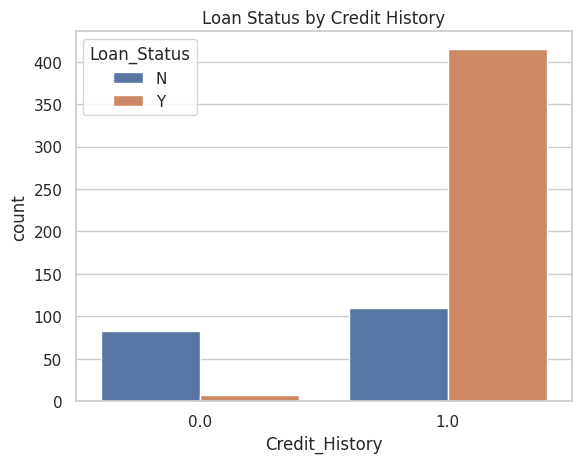

In [6]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.show()


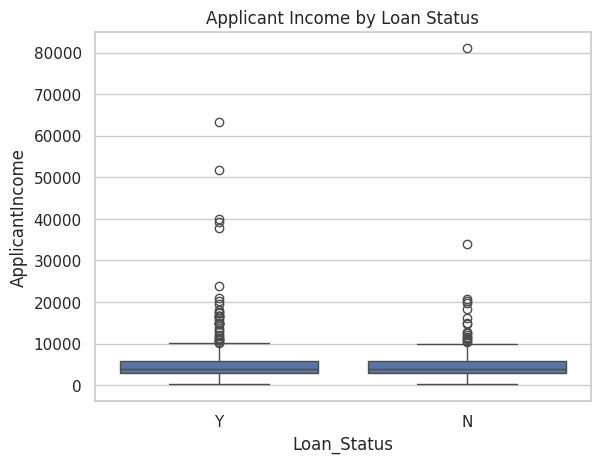

In [7]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.show()


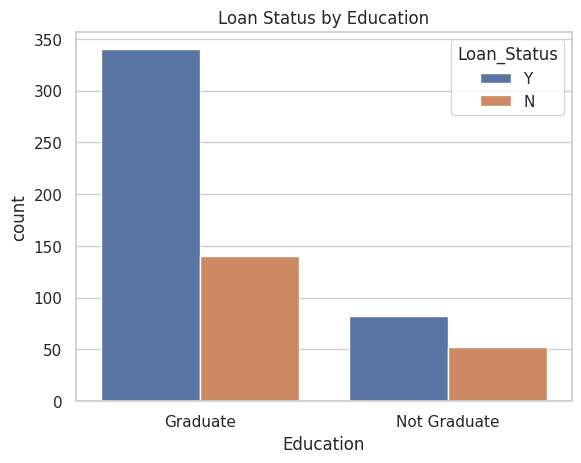

In [8]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()


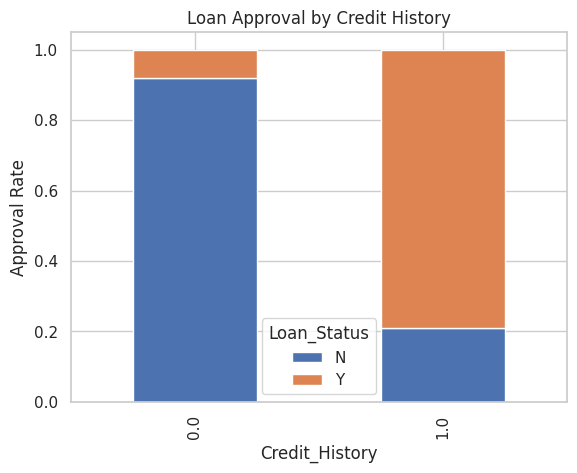

In [9]:
# Approval rate by Credit History
loan_approval_by_credit = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
loan_approval_by_credit.plot(kind='bar', stacked=True)
plt.title('Loan Approval by Credit History')
plt.ylabel('Approval Rate')
plt.show()


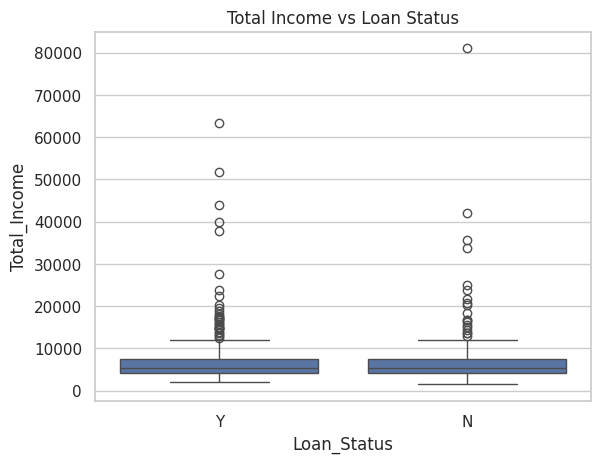

In [10]:
# Create total income column
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Visualize total income vs loan status
sns.boxplot(x='Loan_Status', y='Total_Income', data=df)
plt.title('Total Income vs Loan Status')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
df_encoded = df.copy()
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Features and target
X = df_encoded[['Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = df_encoded['Loan_Status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [12]:
import numpy as np

feature_names = X.columns
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {np.round(coef, 2)}")


Credit_History: 3.23
ApplicantIncome: -0.0
CoapplicantIncome: -0.0
LoanAmount: -0.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Style
sns.set(style="whitegrid")


/tmp/ipython-input-14-3573246025.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='Set2')


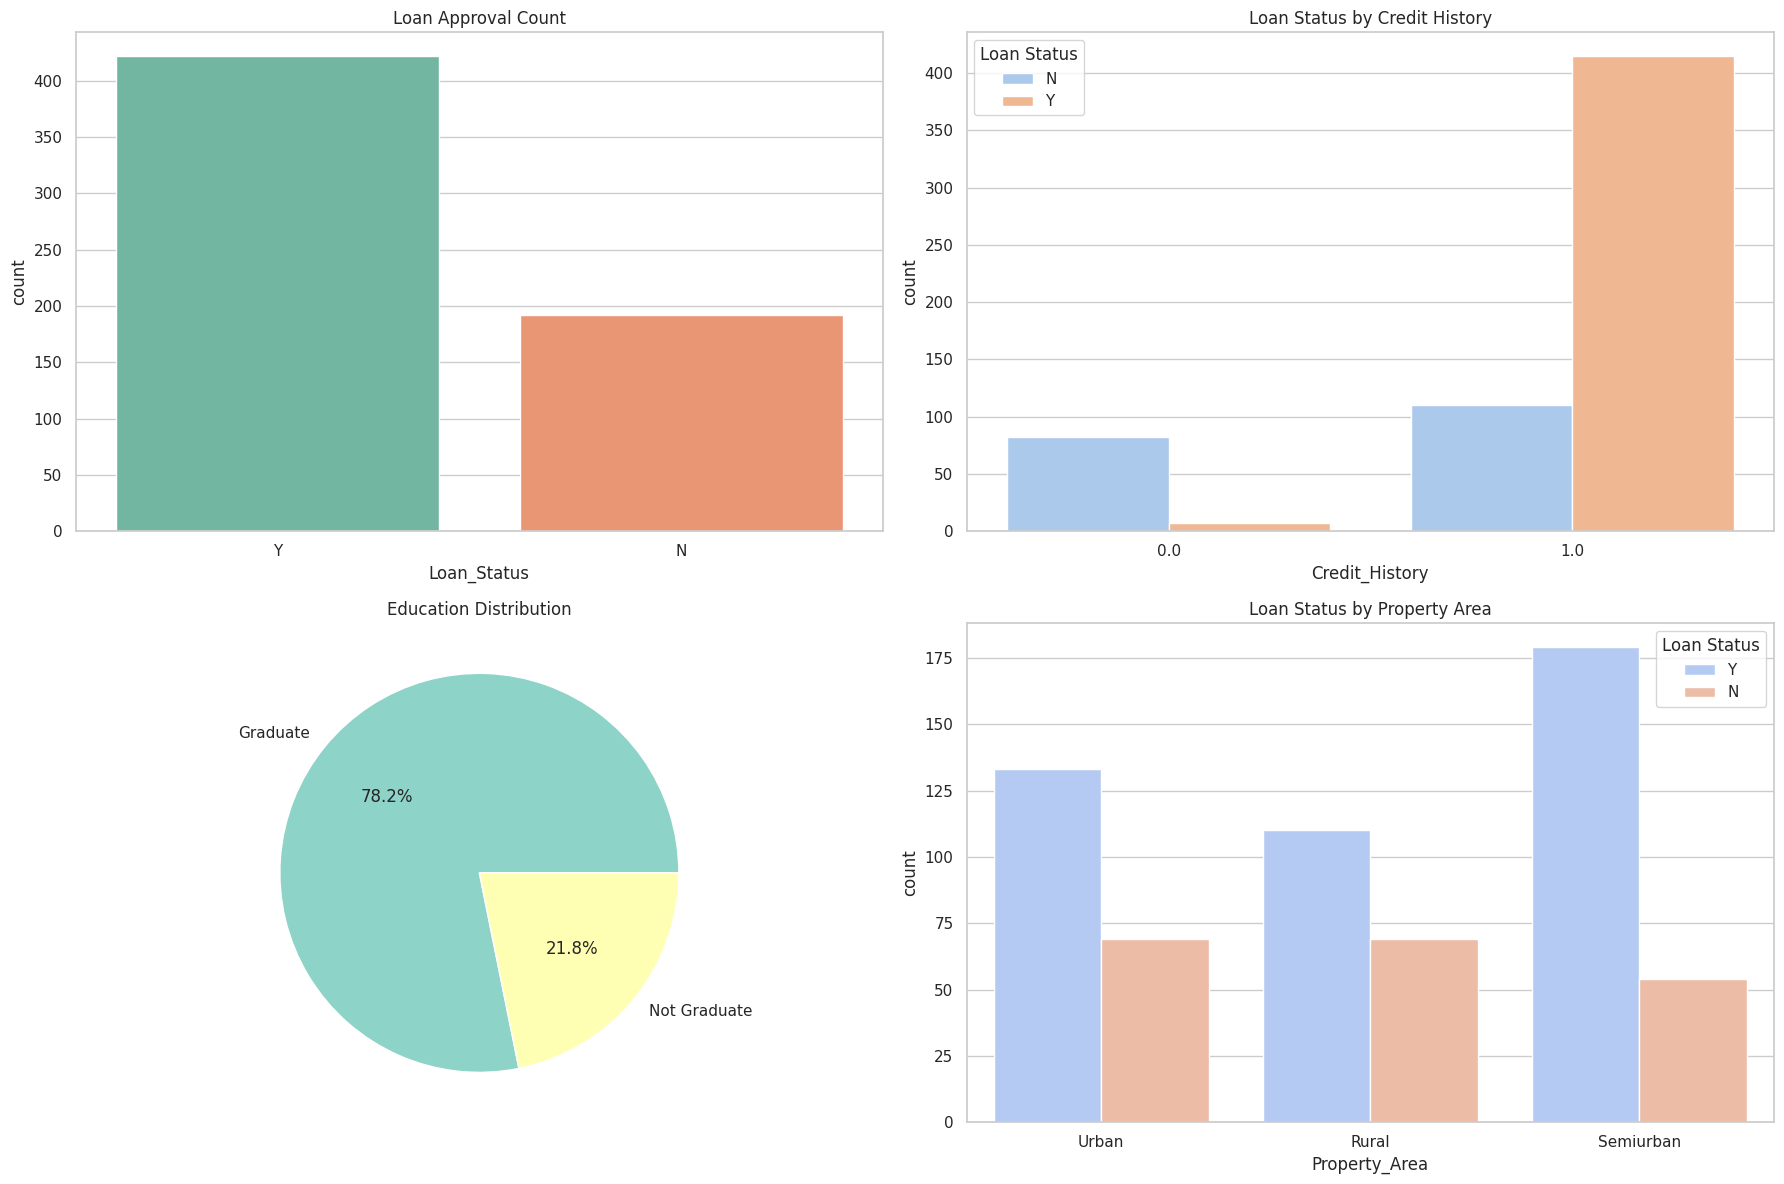

In [14]:
# Set dashboard figure
plt.figure(figsize=(18, 12))

# Plot 1: Loan Status Count
plt.subplot(2, 2, 1)
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title("Loan Approval Count")

# Plot 2: Credit History vs Loan Status (Grouped Bar)
plt.subplot(2, 2, 2)
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='pastel')
plt.title("Loan Status by Credit History")
plt.legend(title="Loan Status")

# Plot 3: Pie Chart - Education Distribution
plt.subplot(2, 2, 3)
edu_counts = df['Education'].value_counts()
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Education Distribution")

# Plot 4: Property Area vs Loan Status
plt.subplot(2, 2, 4)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='coolwarm')
plt.title("Loan Status by Property Area")
plt.legend(title="Loan Status")

plt.tight_layout()
plt.show()


In [15]:
plt.savefig("loan_dashboard.png")


<Figure size 640x480 with 0 Axes>